In [1]:
#importing of libraries 
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.utils import shuffle 
import random
from mlxtend.plotting import plot_decision_regions 

In [2]:
#LOAD DATASET
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width','class']
dataset = read_csv (url, names=columns)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#split columns into features and label
np.random.seed(42)
dataset = shuffle(dataset)
array = np.array(dataset.values)
data = array[:,0:4] #features
labels = array [:,4:] # label

In [7]:
labels = np.reshape(labels, (labels.shape[0], )) #Reshaping the labels to be 1D-nparray -> To fit model shape.
print(labels.shape)
print(dataset['class'].unique())

(150,)
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica']


In [8]:
for i in range(len(labels)):
    if labels[i] == 'Iris-setosa' : labels[i] = 0
    elif labels[i] == 'Iris-virginica' : labels[i] = 1
    else : labels[i] = 2

In [9]:
for i in range(5):
    print(labels[i])

2
0
1
2
2


In [10]:
# function to split data into training data, validation data and testing data
def train_validate_test_split(data, labels, testRatio=0.3, valRatio=0.3):
    rec = len(data)
    trainRatio = 1-(testRatio+valRatio)
    trainDt = int(trainRatio*rec) #60
    valDt = int(valRatio*rec) + trainDt #105
    tstDt = int(testRatio*rec) + valDt #150
    x_train = data[:trainDt]
    x_val = data[trainDt:valDt]
    x_test = data[valDt:]
    y_train = labels[:trainDt]
    y_val = labels[trainDt:valDt]
    y_test = labels[valDt:]
    return x_train, y_train, x_val, y_val, x_test, y_test 

In [11]:
def calculate_accuracy(predicted_y, y):
    predicted = model.predict(predicted_y)
    s = len(y)
    counter = 0
    for i in range(0,s):
        if predicted[i] == y[i]:
            counter+=1
        else:
            continue
    acc = (counter/len(y))*100        
    return acc

In [12]:
model = GaussianNB()

In [13]:
x_train, y_train, x_val, y_val, x_test, y_test = train_validate_test_split(data,labels)

In [14]:
y_train = y_train.astype('float')
y_val = y_val.astype('float')
y_test = y_test.astype('float')

In [15]:
model.fit(x_train, y_train)

GaussianNB()

In [16]:
calculate_accuracy(x_val, y_val)

93.33333333333333

In [17]:
calculate_accuracy(x_test, y_test)

97.77777777777777

In [18]:
model.predict(x_test)

array([0., 1., 1., 0., 2., 2., 1., 2., 1., 0., 1., 2., 1., 2., 2., 2., 0.,
       2., 2., 0., 2., 1., 1., 0., 2., 1., 1., 0., 1., 0., 2., 1., 1., 2.,
       1., 2., 2., 1., 1., 0., 2., 2., 0., 2., 1.])

In [19]:
print("Accuracy: ",model.score(x_val, y_val)*100)

Accuracy:  93.33333333333333


In [20]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


In [21]:
def plot_decision_boundaries(X, y,x_label,y_label,model_class,**model_params):
    
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel(x_label,fontsize=15)
    plt.ylabel(y_label,fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

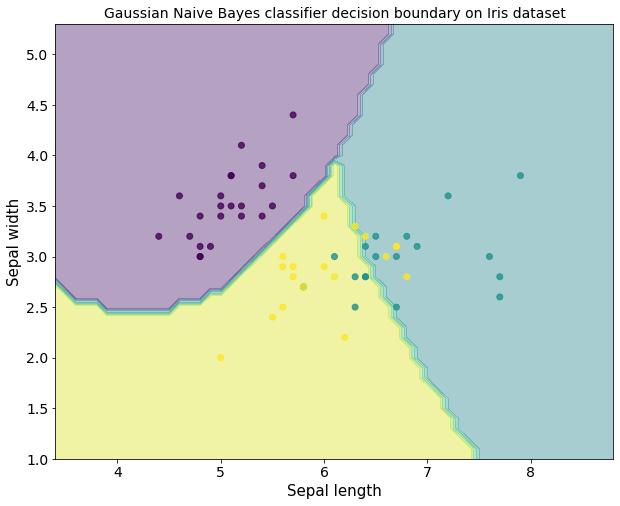

In [22]:
# Plotting the decision boundaires ...
plt.figure(figsize=(10, 8))
plt.title("Gaussian Naive Bayes classifier decision boundary on Iris dataset",fontsize=14)
plot_decision_boundaries(x_train,y_train,"Sepal length","Sepal width",GaussianNB)
plt.show()